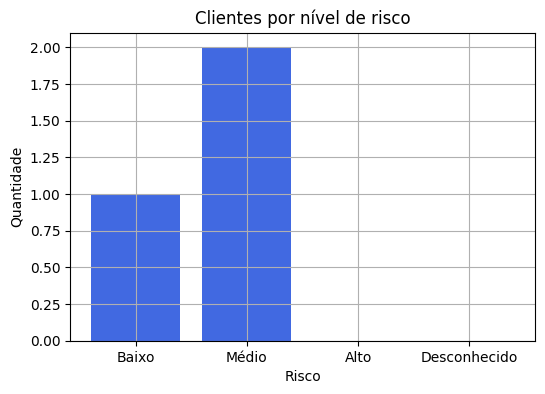

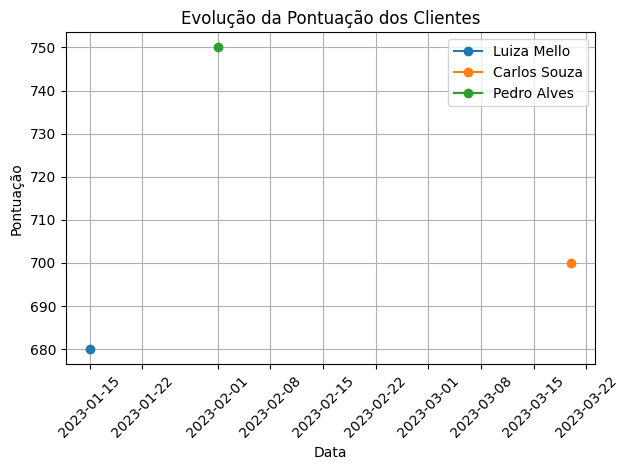

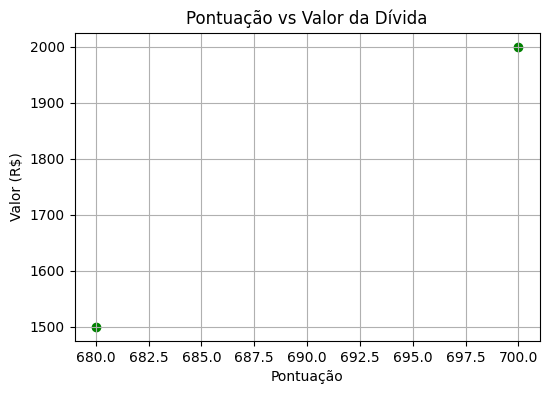

In [15]:
# Inserir  Bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Upload do arquivo "planilha_original.xlsx" do computador
from google.colab import files
df = pd.read_excel('/content/planilha_original.xlsx', sheet_name='Página1')

# Leitura da aba 'Página1' da planilha
xls = pd.ExcelFile("planilha_original.xlsx")
df = xls.parse('Página1')

# Seleção e limpezar dos dados relevantes
df_clean = df[[
    'Nome', 'CPF', 'Pontuacao', 'Fonte', 'Data Consulta',
    'Status', 'Valor.1', 'Departamento', 'Responsavel'
]].copy()

df_clean.drop_duplicates(subset=['Nome', 'CPF', 'Data Consulta'], inplace=True)
df_clean['Pontuacao'] = pd.to_numeric(df_clean['Pontuacao'], errors='coerce')
df_clean['Valor.1'] = pd.to_numeric(df_clean['Valor.1'], errors='coerce')

#  Listas, tuplas e dicionários
clientes = list(df_clean['Nome'].unique())
clientes_pontuacao = list(zip(df_clean['Nome'], df_clean['Pontuacao']))
valores_por_departamento = df_clean.groupby('Departamento')['Valor.1'].sum().to_dict()

#  Condicional: classificar risco de crédito
def classificar_risco(pontuacao):
    if pd.isna(pontuacao):
        return "Desconhecido"
    elif pontuacao >= 750:
        return "Baixo"
    elif pontuacao >= 650:
        return "Médio"
    else:
        return "Alto"

df_clean['Risco'] = df_clean['Pontuacao'].apply(classificar_risco)

# Fazer Loop para contar clientes por nível de risco
contagem_risco = {'Baixo': 0, 'Médio': 0, 'Alto': 0, 'Desconhecido': 0}
for risco in df_clean['Risco']:
    contagem_risco[risco] += 1

# Fazer as Estatísticas com NumPy
pontuacoes_array = df_clean['Pontuacao'].dropna().values
media_pontuacao = np.mean(pontuacoes_array)
desvio_pontuacao = np.std(pontuacoes_array)

# Fazer os Agrupamentos com pandas
media_por_departamento = df_clean.groupby('Departamento')['Pontuacao'].mean()
contagem_status = df_clean['Status'].value_counts()

# Fazer o Gráfico de barras: clientes por risco
plt.figure(figsize=(6,4))
plt.bar(contagem_risco.keys(), contagem_risco.values(), color='royalblue')
plt.title("Clientes por nível de risco")
plt.xlabel("Risco")
plt.ylabel("Quantidade")
plt.grid(True)
plt.show()

# Fazer o Gráfico de linhas: evolução da pontuação
for nome in df_clean['Nome'].unique():
    dados_cliente = df_clean[df_clean['Nome'] == nome]
    plt.plot(dados_cliente['Data Consulta'], dados_cliente['Pontuacao'], marker='o', label=nome)

plt.title("Evolução da Pontuação dos Clientes")
plt.xlabel("Data")
plt.ylabel("Pontuação")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  Fazer o Gráfico de dispersão: pontuação x valor
plt.figure(figsize=(6,4))
plt.scatter(df_clean['Pontuacao'], df_clean['Valor.1'], color='green')
plt.title("Pontuação vs Valor da Dívida")
plt.xlabel("Pontuação")
plt.ylabel("Valor (R$)")
plt.grid(True)
plt.show()
